In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
# Loading and Building Datast 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
# normalized RGB values 256,288 to 0 to 1 scale
x_test = tf.keras.utils.normalize(x_test, axis=1)


###***SEQUANTIAL MODEL WITH FULLY CONNECTED DANSE LAYERS***

In [ ]:
# Sequantial model using DENSE layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
# Summary of model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# model compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model.fit(x_train,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6595 - sparse_categorical_accuracy: 0.8255
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5193 - sparse_categorical_accuracy: 0.9450
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5043 - sparse_categorical_accuracy: 0.9584
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4951 - sparse_categorical_accuracy: 0.9674
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4902 - sparse_categorical_accuracy: 0.9719
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4853 - sparse_categorical_accuracy: 0.9767


In [ ]:
# Checking For Overfitting
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 1.4960 - sparse_categorical_accuracy: 0.9655
1.495985507965088 0.965499997138977


***OUTPUT VALIDATION WITH EXAMPLES***

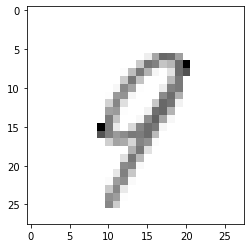

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[22], cmap=plt.cm.binary)
plt.show()

##***CROSS CHECKING THE OUTPUT of Sequantial model DEnse layer***

In [ ]:
import numpy as np

In [ ]:
pred = model.predict([x_test])

In [ ]:
print(np.argmax(pred[12]))

9


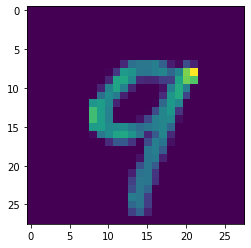

In [ ]:
plt.imshow(x_test[12])
plt.show()